# $\color{ForestGreen}{\text{An Example of Binary Logistic Regression}}$

In [1]:
# Importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import mlxtend

df=pd.read_csv('../Week-4/SeattleWeather.csv')     # Reading the csv source file as a dataframe
df.shape

(25551, 5)

In [2]:
df.sample(5)     # A sample of 5 random rows of 'df'

,DATE,PRCP,TMAX,TMIN,RAIN
16672,1993-08-24,0.02,68,51,True
556,1949-07-10,0.00,82,50,False
18069,1997-06-21,0.09,59,51,True
3179,1956-09-14,0.00,69,47,False
4086,1959-03-10,0.06,49,34,True


In [3]:
# Defining a target variable that casts the rain condition (0 for not rainy, and 1 for rainy)

df['Target'] = df.RAIN.map(lambda x: 1 if x==True else 0)
df.sample(5)

,DATE,PRCP,TMAX,TMIN,RAIN,Target
6271,1965-03-03,0.00,69,48,False,0
9988,1975-05-07,0.00,62,41,False,0
19954,2002-08-19,0.00,70,51,False,0
4753,1961-01-05,0.91,52,42,True,1
24966,2016-05-09,0.00,67,46,False,0


In [4]:
#Defining 'TMIN' and 'TMAX' as features and the target as numpy arrays

X = df[['TMIN','TMAX']].to_numpy()
y = df.Target.to_numpy()

In [5]:
# Dividing the features and the target variable into the train and test subsets 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5, stratify=y)

In [6]:
# Checking the distribution of the train and test categories for the target variable 

print(np.bincount(y))
print(np.bincount(y_train))
print(np.bincount(y_test))

[14651 10900]
[10255  7630]
[4396 3270]


In [7]:
from sklearn.linear_model import LogisticRegression   # Importing Logistic Regression from sklearn

logreg = LogisticRegression(penalty = 'none', max_iter = 10000) # Instantiating logistic regression 

logreg.fit(X_train, y_train)  # Fitting the train data to 'logreg'

LogisticRegression(max_iter=10000, penalty='none')

In [8]:
# Predicted class for the test subset through logistic regression 

y_train_pred_prob = logreg.predict_proba(X_train)  # Calculating probabilities of the two classes in train subset
y_test_pred_prob = logreg.predict_proba(X_test)    # Calculating probabilities of the two classes in test subset

# Presenting the probabilities for the 1st 10 instances in train subset

print('Train predictions for probabilities:\n\n', y_train_pred_prob[:10],'\n')

# Presenting the probabilities for the 1st 10 instances in test subset

print('Test predictions for probabilities:\n\n', y_test_pred_prob[:10])

Train predictions for probabilities:

 [[0.35200246 0.64799754]
 [0.27913347 0.72086653]
 [0.37547161 0.62452839]
 [0.57136744 0.42863256]
 [0.28272534 0.71727466]
 [0.56117778 0.43882222]
 [0.94079684 0.05920316]
 [0.70590084 0.29409916]
 [0.58293863 0.41706137]
 [0.57860941 0.42139059]] 

Test predictions for probabilities:

 [[0.18758714 0.81241286]
 [0.62558783 0.37441217]
 [0.89430244 0.10569756]
 [0.45018241 0.54981759]
 [0.90953918 0.09046082]
 [0.32937617 0.67062383]
 [0.4022255  0.5977745 ]
 [0.4022255  0.5977745 ]
 [0.51537775 0.48462225]
 [0.64752248 0.35247752]]


In [9]:
y_train_pred = y_train_pred_prob.argmax(axis=1)  # Finding the predicted class for train predictions
y_test_pred = y_test_pred_prob.argmax(axis=1)  # Finding the predicted class for test predictions

# Presenting the predicted classes for the 1st 10 instances of train

print('Predicted class for train: ', y_train_pred[:10],'\n')     

# Presenting the predicted classes for the 1st 10 instances of test

print('Predicted class for train: ', y_test_pred[:10])

Predicted class for train:  [1 1 1 0 1 0 0 0 0 0] 

Predicted class for train:  [1 0 0 1 0 1 1 1 0 0]


In [10]:
# Calculating the train and test accuracy scores of the model

from sklearn import metrics    # Importing 'metrics' from sklearn

train_score = metrics.accuracy_score(y_train, y_train_pred) # train accuracy

test_score = metrics.accuracy_score(y_test, y_test_pred)    # test accuracy

print('Train accuracy score of the model is ', round(train_score, 5),'\n')
print('Test accuracy score of the model is ', round(test_score, 5))

Train accuracy score of the model is  0.74895 

Test accuracy score of the model is  0.7575


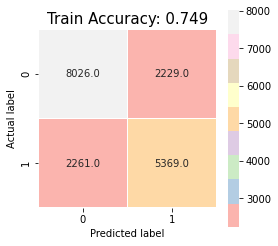

Classification Report for the Train Subset: 

               precision    recall  f1-score   support

           0       0.78      0.78      0.78     10255
           1       0.71      0.70      0.71      7630

    accuracy                           0.75     17885
   macro avg       0.74      0.74      0.74     17885
weighted avg       0.75      0.75      0.75     17885



In [11]:
# Computing the confusion matrix for the train subset

from sklearn.metrics import confusion_matrix, classification_report

train_c_matrix = confusion_matrix(y_train, y_train_pred)  # Compute the train confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(train_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Train Accuracy: {0}'.format(round(train_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

# Print the train classification report

print('Classification Report for the Train Subset: \n\n', classification_report(y_train, y_train_pred))

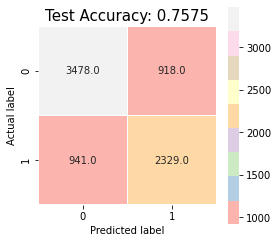

Classification Report for the Test Subset: 

               precision    recall  f1-score   support

           0       0.79      0.79      0.79      4396
           1       0.72      0.71      0.71      3270

    accuracy                           0.76      7666
   macro avg       0.75      0.75      0.75      7666
weighted avg       0.76      0.76      0.76      7666



In [12]:
# Computing the confusion matrix for the test subset

test_c_matrix = confusion_matrix(y_test, y_test_pred)  # Compute the test confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(test_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

# Print the train classification report

print('Classification Report for the Test Subset: \n\n', classification_report(y_test, y_test_pred))

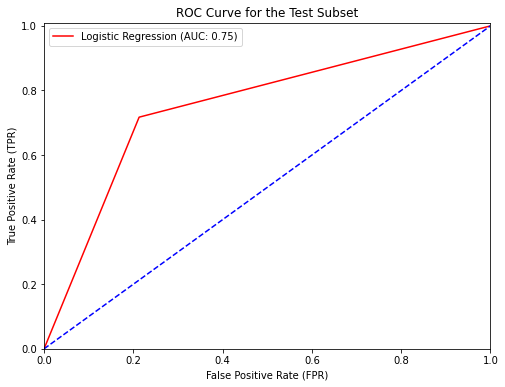

In [13]:
# Plotting the ROC curve for the test subset

from sklearn.metrics import roc_curve, auc   # Importing 'roc_curve' and 'auc' from sklearn

fpr, tpr, thresholds = roc_curve(y_test_pred, y_test)  # Computing ROC for the test subset
auc(fpr, tpr)                                          # Computing AUC for the test subset 

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', label='Logistic Regression (AUC: %.2f)'
% auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve for the Test Subset')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

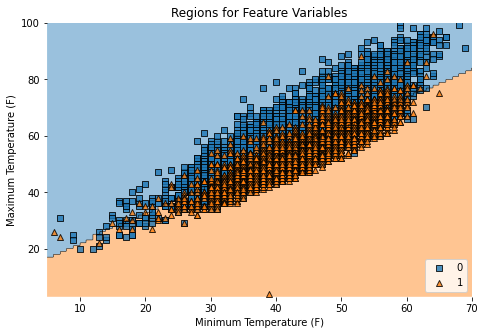

In [14]:
# Plotting the decision regions

from mlxtend.plotting import plot_decision_regions

mlxtend.plotting.plot_decision_regions(X=X_test, y=y_test, clf=logreg) # Plotting the decision region

plt.title('Regions for Feature Variables')
plt.xlabel('Minimum Temperature (F)')
plt.ylabel('Maximum Temperature (F)') 
plt.legend(loc='lower right')
plt.tight_layout()
plt.gcf().set_size_inches(7, 5)
plt.show()

## 0: No Rain
## 1: Rain